In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
plt.style.use('/home/luuk/Documents/MNRAS_stylesheet')

In [190]:
future_NL_GDP = pd.read_csv('./predicted_GDP_future.csv')
future_NL_GDP = future_NL_GDP[['TIME','Value']]
future_NL_GDP['Growth'] = future_NL_GDP.Value.pct_change()+1
future_NL_GDP = future_NL_GDP.set_index('TIME')
future_NL_GDP.loc[2020,'Growth'] = future_NL_GDP.Growth.mean()
future_NL_GDP.Growth = future_NL_GDP.Growth-0.01

In [191]:
future_NL_GDP['r1'] = 1-0.005
future_NL_GDP['r2'] = 1
future_NL_GDP['r3'] = future_NL_GDP.Growth
future_NL_GDP['r4'] = 1+0.01
future_NL_GDP['r5'] = 1+0.02

In [192]:
def debt_progress(df):
    df.columns = ['Growth','Rate']
    df['debt'] = 0
    df.loc[2020,'debt'] = 68.51
    for year in df.index[:-1]:
        g = df.loc[year,'Growth']
        r = df.loc[year,'Rate']
        df.loc[year+1,'debt'] = df.loc[year,'debt'] *(1/g)*r 
    return df

<ipython-input-192-28fa2bf12c39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['debt'] = 0
/home/luuk/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/luuk/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

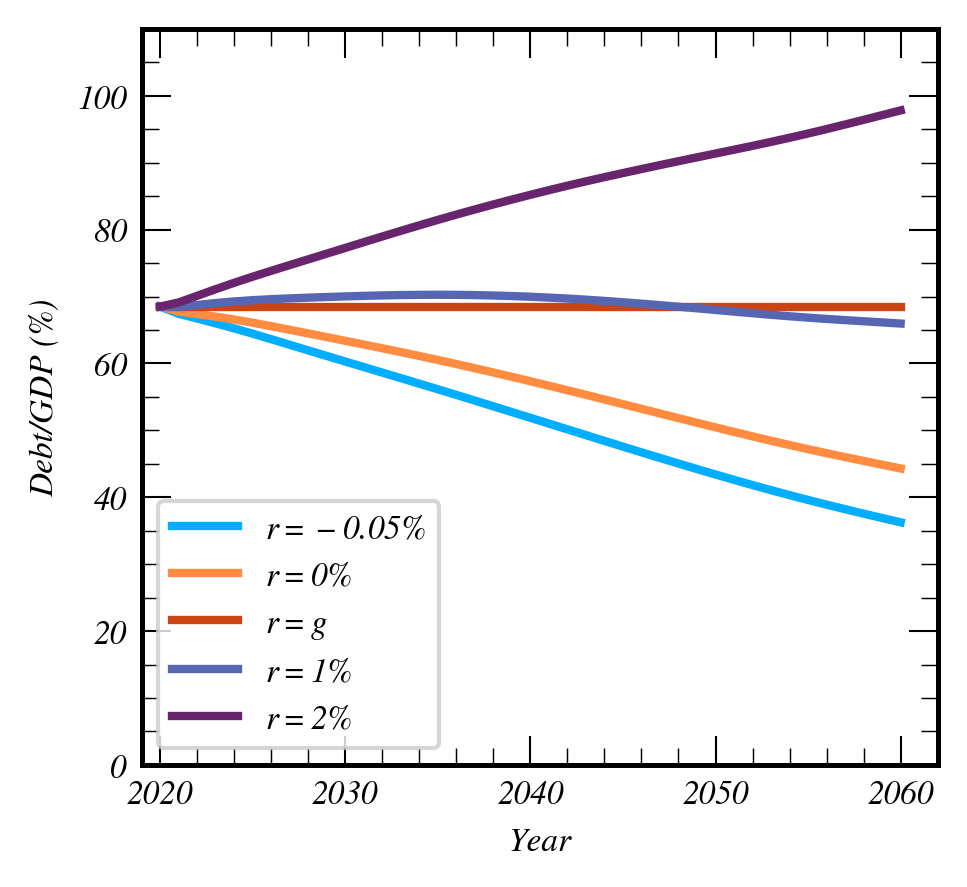

In [229]:
df1 = debt_progress(future_NL_GDP[['Growth','r1']])
df2 = debt_progress(future_NL_GDP[['Growth','r2']])
df3 = debt_progress(future_NL_GDP[['Growth','r3']])
df4 = debt_progress(future_NL_GDP[['Growth','r4']])
df5 = debt_progress(future_NL_GDP[['Growth','r5']])

fig=plt.figure()#figsize=(6,5))
plt.plot(df1.index, df1.debt,label=r'$r=-0.05\%$')
plt.plot(df2.index, df2.debt,label=r'$r=0\%$')
plt.plot(df3.index, df3.debt,label=r'$r=g$')
plt.plot(df4.index, df4.debt,label=r'$r=1\%$')
plt.plot(df5.index, df5.debt,label=r'$r=2\%$')

plt.ylabel('Debt/GDP (%)')
plt.xlabel('Year')
plt.tight_layout()
plt.legend(frameon = 1)
plt.xlim(2019,2062)
plt.ylim(0,110)
plt.savefig('debt_vs_GDP_interestrate.pdf',bbox_inches='tight')

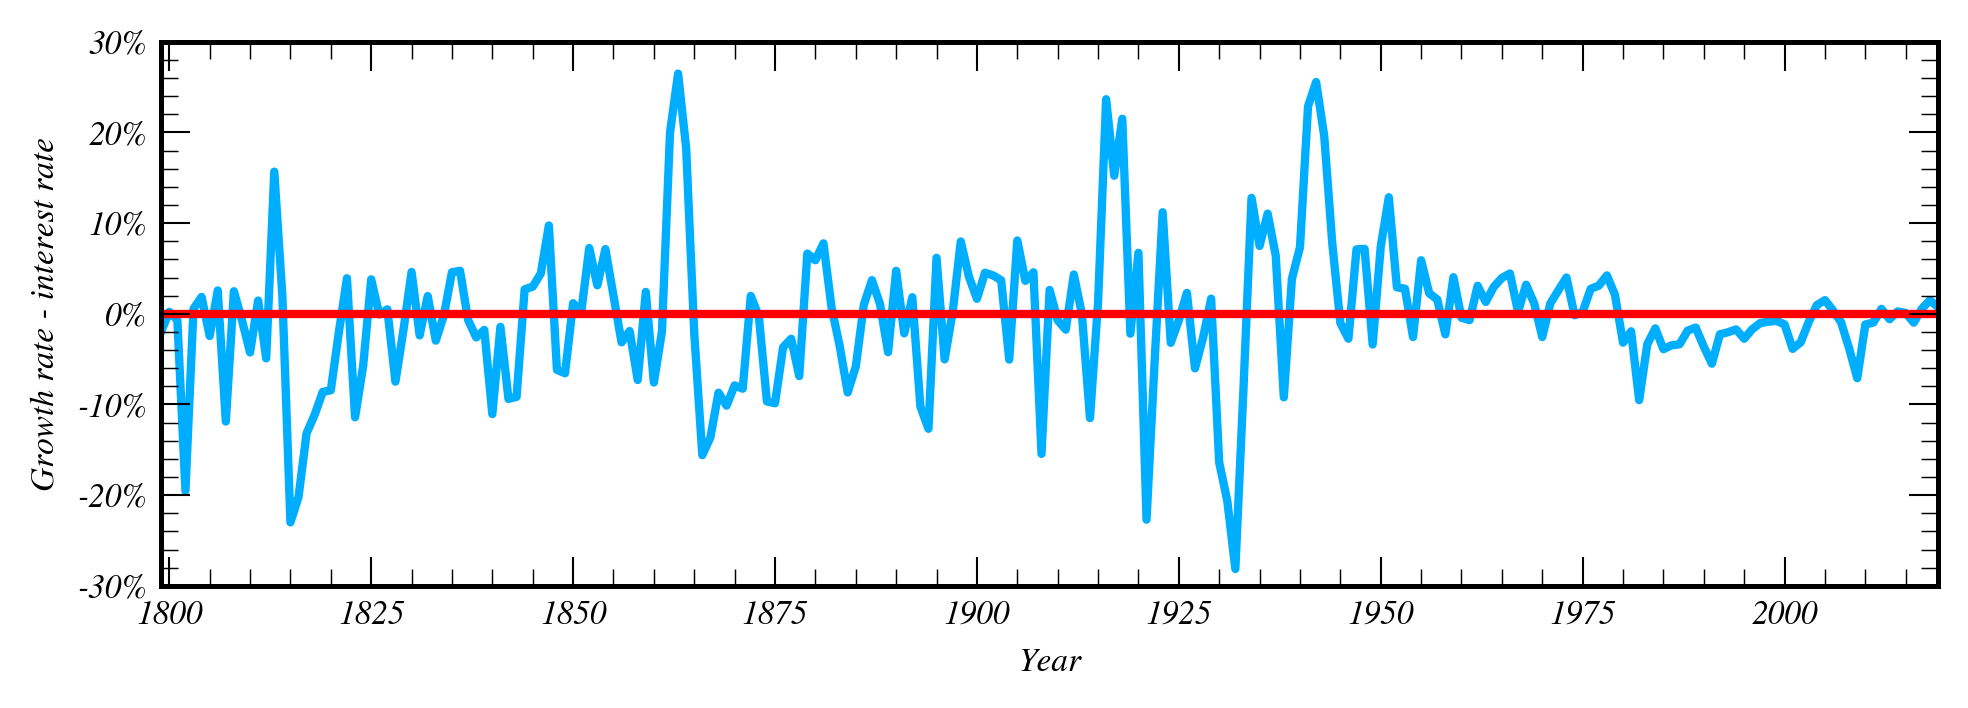

In [252]:
historical_GDP = pd.read_csv('US_historical_gdp.csv').set_index('Year')
historical_interest = pd.read_csv('US_interestrates_historical.csv').set_index('Year')
historical_GDP

historical_interest = historical_interest['US Long-Term Rate: Consistent Series']
historical_GDP = historical_GDP['Nominal GDP (million of Dollars)'].pct_change()*100

plt.figure(figsize=(6.6,2.4))
plt.plot(historical_GDP - historical_interest)
plt.axhline(0,color='red')

plt.yticks(plt.yticks()[0],labels=[str(int(w))+'%' for w in plt.yticks()[0]])
plt.ylabel('Growth rate - interest rate')
plt.xlabel('Year')
plt.tight_layout()
plt.savefig('historical_growthmininterest.pdf',bbox_inches='tight')